# Exploratory Data Analysis (Netflix movie recommendation)

**<font color = 'teal' > After data wrangling, the exploratory data analysis will be carried out on both Kaggle and IMDB datasets. Both datasets contain only movies.**

### Import necessary Python packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part - I:  Investigation into Kaggle Dataset  

In [2]:
Kaggledata = pd.read_csv('clean_datafiles/mydata_movies_only.csv', index_col = 0)

In [3]:
Kaggledata.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration_min,listed_in,description
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020,2019,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [4]:
Kaggledata.tail(3)

,show_id,type,title,cast,country,date_added,release_year,rating,duration_min,listed_in,description
7781,s7782,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020,2005,TV-MA,99,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
Kaggledata.shape

(4761, 11)

In [6]:
Kaggledata.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration_min', 'listed_in', 'description'],
      dtype='object')

In [7]:
Kaggledata.dtypes

show_id         object
type            object
title           object
cast            object
country         object
date_added       int64
release_year     int64
rating          object
duration_min     int64
listed_in       object
description     object
dtype: object

In [8]:
Kaggledata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4761 entries, 1 to 7783
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4761 non-null   object
 1   type          4761 non-null   object
 2   title         4761 non-null   object
 3   cast          4761 non-null   object
 4   country       4761 non-null   object
 5   date_added    4761 non-null   int64 
 6   release_year  4761 non-null   int64 
 7   rating        4761 non-null   object
 8   duration_min  4761 non-null   int64 
 9   listed_in     4761 non-null   object
 10  description   4761 non-null   object
dtypes: int64(3), object(8)
memory usage: 446.3+ KB


## Drawing insights from each column of the dataset

We can see that, there are some columns like country, languge, listed_in or genre, actor ect with many unique values combined together in one row relating to one movie. To have an idea on total number of unique values and to carry out feature engineering, we need to seaparte them. For this, a function is defined below: 

In [9]:
def column_details(dataset, col):
    Number_of_unique_values = dataset[col].nunique()
    arr1 = dataset[col].value_counts()
    arr2 = dataset[col].value_counts(normalize = True)
    arr3 = arr1.head(20)
    return arr1, arr2, arr3

**<font color = 'teal'> There are different countries making films, some make in large number while some make very few.  So let us sort out the countries according to the movie numbers, normalize them and visualize in barplot. </font>**

In [10]:
print('Number of movies in each country in Kaggle dataset')
print(column_details(Kaggledata, 'country')[0],"\n\n", column_details(Kaggledata, 'country')[1])
print("\n",column_details(Kaggledata, 'country')[1])

Number of movies in each country in Kaggle dataset
United States                                        1667
India                                                 837
United Kingdom                                        163
Canada                                                106
Egypt                                                  88
                                                     ... 
United Kingdom, United States, Morocco                  1
France, China, Japan, United States                     1
United States, East Germany, West Germany               1
United States, China, Colombia                          1
United States, United Kingdom, Spain, South Korea       1
Name: country, Length: 539, dtype: int64 

 United States                                        0.350137
India                                                0.175803
United Kingdom                                       0.034237
Canada                                               0.022264
Egypt              

In [11]:
print('Country with maximum number of movies in Kaggle dataset:', column_details(Kaggledata, 'country')[0].idxmax(axis = 1))

Country with maximum number of movies in Kaggle dataset: United States


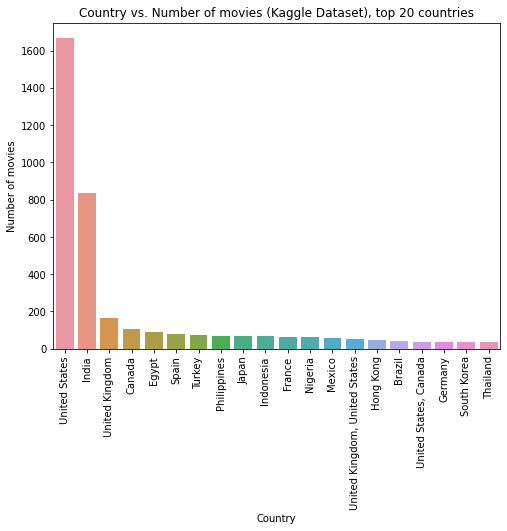

In [12]:
# Plot top 20 countries based on movie production
plt.figure(figsize = (8, 6))
sns.barplot(x = column_details(Kaggledata, 'country')[2].index, y = column_details(Kaggledata, 'country')[2].values)
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('Number of movies')
plt.title("Country vs. Number of movies (Kaggle Dataset), top 20 countries")
plt.show()

**It shows, USA produced the maximum number of movies, India ranks second while United Kingdom in third place.** 

**<font color = 'teal'> In different years, movies have been released. A detail investigation into this column is given below</font>**

In [13]:
print('The number of movies released in each year as listed in Kaggle dataset')
column_details(Kaggledata, 'release_year')[0], column_details(Kaggledata, 'release_year')[1]

The number of movies released in each year as listed in Kaggle dataset


(2017    636
 2018    628
 2016    559
 2019    482
 2020    353
        ... 
 1966      1
 1942      1
 1945      1
 1964      1
 1946      1
 Name: release_year, Length: 71, dtype: int64, 2017    0.133585
 2018    0.131905
 2016    0.117412
 2019    0.101239
 2020    0.074144
           ...   
 1966    0.000210
 1942    0.000210
 1945    0.000210
 1964    0.000210
 1946    0.000210
 Name: release_year, Length: 71, dtype: float64)

In [14]:
print("The total number of listed years in which movies have been released : ", len(column_details(Kaggledata, 'release_year')[0].index))
print("The maximum number of movies released in the year: ", column_details(Kaggledata, 'release_year')[0].idxmax(axis = 1))

The total number of listed years in which movies have been released :  71
The maximum number of movies released in the year:  2017


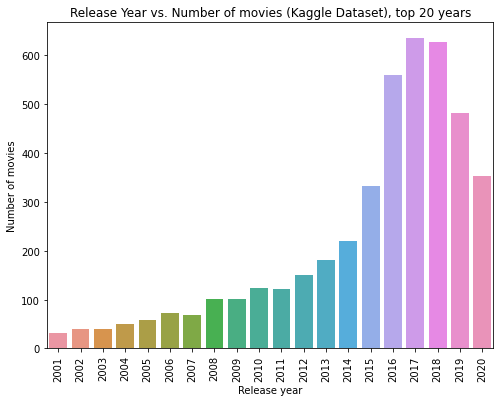

In [15]:
# Make bar plot of top 20 years based on the number of movies
plt.figure(figsize = (8, 6))
sns.barplot(x = column_details(Kaggledata, 'release_year')[2].index, y = column_details(Kaggledata, 'release_year')[2].values)
plt.xlabel('Release year')
plt.ylabel('Number of movies')
plt.title("Release Year vs. Number of movies (Kaggle Dataset), top 20 years")
plt.xticks(rotation = 90)
plt.show()

**<font color = 'teal'>Let us investigate into the movie "added_year" i.e year the movies have been added to Netflix.</font>**

In [16]:
column_details(Kaggledata, 'date_added')[0], column_details(Kaggledata, 'date_added')[1]

(2019    1334
 2020    1190
 2018    1128
 2017     735
 2016     210
 2021      76
 2015      47
 2014      15
 2011      13
 2013       6
 2012       3
 2009       2
 2008       1
 2010       1
 Name: date_added, dtype: int64, 2019    0.280193
 2020    0.249947
 2018    0.236925
 2017    0.154379
 2016    0.044108
 2021    0.015963
 2015    0.009872
 2014    0.003151
 2011    0.002731
 2013    0.001260
 2012    0.000630
 2009    0.000420
 2008    0.000210
 2010    0.000210
 Name: date_added, dtype: float64)

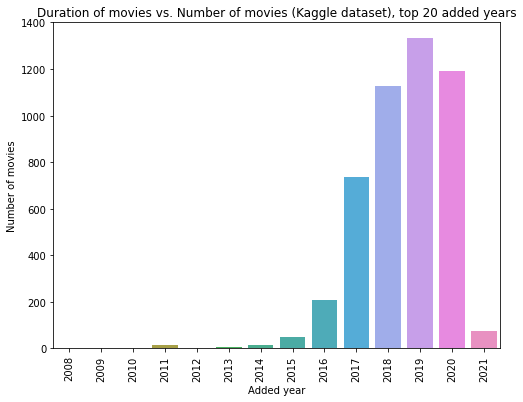

In [17]:
# Plot the added_year vs number of movies
plt.figure(figsize = (8, 6))
sns.barplot(x = column_details(Kaggledata, 'date_added')[0].index, y = column_details(Kaggledata, 'date_added')[0].values)
plt.xlabel('Added year')
plt.ylabel('Number of movies')
plt.title('Duration of movies vs. Number of movies (Kaggle dataset), top 20 added years')
plt.xticks(rotation = 90)
plt.show()

In [18]:
print('The year with maximum number of movies in Kaggledata dataset:', column_details(Kaggledata, 'date_added')[0].idxmax(axis = 1))

The year with maximum number of movies in Kaggledata dataset: 2019


**<font color = 'teal'>Let us investigate into the movies' duration time in minutes**

In [19]:
column_details(Kaggledata, 'duration_min')[0]

93     121
94     120
90     117
95     114
97     108
      ... 
190      1
194      1
214      1
15       1
203      1
Name: duration_min, Length: 188, dtype: int64

#### **<font color = 'teal'> Distribution of duration of the movies in minutes</font>** 

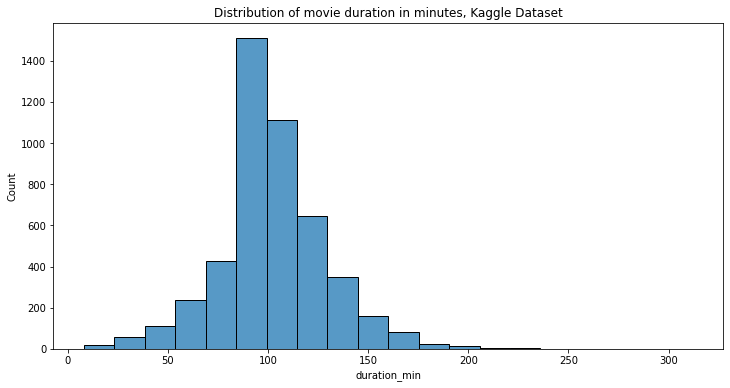

In [20]:
# Plot all the data in the column to see the distribution of duration time
plt.figure(figsize = (12, 6))
sns.histplot(Kaggledata.duration_min, bins = 20)
plt.title('Distribution of movie duration in minutes, Kaggle Dataset')
plt.show()

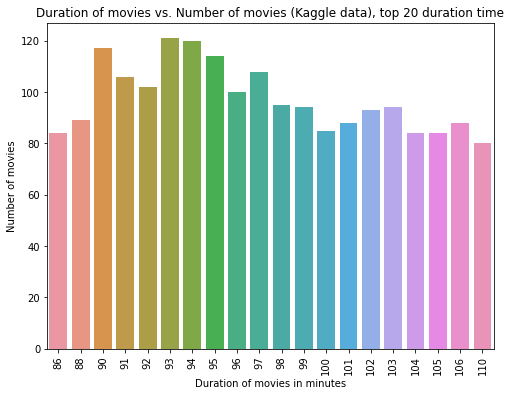

In [21]:
# Plot first 20 duration times with maximum number of movies
plt.figure(figsize = (8, 6))
sns.barplot(x = column_details(Kaggledata, 'duration_min')[2].index, y = column_details(Kaggledata, 'duration_min')[2].values)
plt.xlabel('Duration of movies in minutes')
plt.ylabel('Number of movies')
plt.title('Duration of movies vs. Number of movies (Kaggle data), top 20 duration time')
plt.xticks(rotation = 90)
plt.show()

In [22]:
print("The maximum number of movies of duration: ", column_details(Kaggledata, 'duration_min')[0].idxmax(axis = 1), 'minutes')
print("The minimum number of movies of duration: ", column_details(Kaggledata, 'duration_min')[0].idxmin(axis = 1), 'minutes')
print('Maximum duration of the movie:', Kaggledata.duration_min.max(), 'minutes')
print('Minimum duration of the movie:', Kaggledata.duration_min.min(), 'minutes')

The maximum number of movies of duration:  93 minutes
The minimum number of movies of duration:  191 minutes
Maximum duration of the movie: 312 minutes
Minimum duration of the movie: 8 minutes


**<font color = 'teal'>  Let us investigate into the number of movies of different rated(PG, R, NR etc) categories.</font>**

In [23]:
movie_rating = Kaggledata.rating.value_counts()

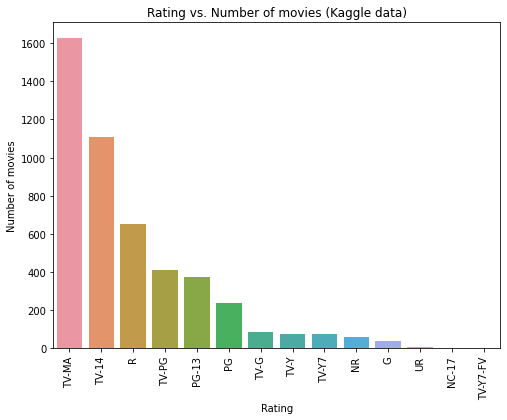

In [24]:
# Let us make plot of "rating" vs "number of movies"
plt.figure(figsize = (8, 6))
sns.barplot(x = movie_rating.index, y = movie_rating.values)
plt.xlabel('Rating')
plt.ylabel('Number of movies')
plt.title('Rating vs. Number of movies (Kaggle data)')
plt.xticks(rotation = 90)
plt.show()

# Let us investigate deep more into each categorical columns 

To do this, let us define a function to see the total unique values into the categorical columns:

In [25]:
def list_unique_values_in_column(data_frame, column):
    df = data_frame[column].str.split(',')
    list1 = []
    for i in df:
        list1.extend(each.strip() for each in i)
#    list2 = sorted(set(list1))
    return set(list1), len(set(list1))

### Types of movies

In [26]:
list_unique_values_in_column(Kaggledata, 'listed_in')

({'Action & Adventure',
  'Anime Features',
  'Children & Family Movies',
  'Classic Movies',
  'Comedies',
  'Cult Movies',
  'Documentaries',
  'Dramas',
  'Faith & Spirituality',
  'Horror Movies',
  'Independent Movies',
  'International Movies',
  'LGBTQ Movies',
  'Movies',
  'Music & Musicals',
  'Romantic Movies',
  'Sci-Fi & Fantasy',
  'Sports Movies',
  'Stand-Up Comedy',
  'Thrillers'},
 20)

In [27]:
Kaggledata.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration_min', 'listed_in', 'description'],
      dtype='object')

In [28]:
list_unique_values_in_column(Kaggledata, 'cast')

({'Diane Kagan',
  'Devyani Cm',
  'Indrans',
  'Dylan McKiernan',
  'Aminah Tjendrakasih',
  'Freddy Beltrán',
  'S.V. Krishna Shankar',
  'Jonathan Baker',
  'Dong-hwi Lee',
  'Marie Mottet',
  'John Henry Faulk',
  'Yoriko Haraguchi',
  'Annette Funicello',
  'John Edward Lee',
  'Jyothika',
  'Phoebe Robinson',
  'Ian James Corlett',
  'Megan Sousa',
  'Sofía Gala Castiglione',
  'Justin Quintal',
  'Madhavi Juvekar',
  'Kelly Slater',
  'Enrique Arce',
  'Dieter Nuhr',
  'Álex García',
  'Frederique Van Der Wal',
  'Eddie Garcia',
  'Erica Peeples',
  'Jaylin Fletcher',
  'Rianti Cartwright',
  'Abhishek Saha',
  'Miki Esparbé',
  'Sigurdur Jonsson',
  'Jonah Hill',
  'Jo Van Fleet',
  'Nathalie Baye',
  'Anirudh Agarwal',
  'Angus Whinfield',
  'Orkun Karagöz',
  'Fabrício Boliveira',
  'Anand Balraj',
  "Marcus D'Angelo",
  'Mandra Naih',
  'Wojciech Kalinowski',
  'Caroline Chan',
  'Tilda Swinton',
  'VIXX',
  'Dror Keren',
  'Agustín Bernal',
  'Tom Everett',
  'Chinaradi Anu

# Part-II: IMDB dataset

In [29]:
IMDBdata = pd.read_csv('clean_datafiles/IMDB_Movies_cleaned.csv', index_col = 0)
IMDBdata.head(2)

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,imdb_title_id,original_title,year,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,reviews_from_users
0,tt0000009,Miss Jerry,1894,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,1.0
1,tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,7.0


In [30]:
IMDBdata.shape

(72043, 15)

In [31]:
IMDBdata.columns 

Index(['imdb_title_id', 'original_title', 'year', 'genre', 'duration',
       'country', 'language', 'director', 'writer', 'production_company',
       'actors', 'description', 'avg_vote', 'votes', 'reviews_from_users'],
      dtype='object')

In [32]:
IMDBdata.dtypes

imdb_title_id          object
original_title         object
year                   object
genre                  object
duration                int64
country                object
language               object
director               object
writer                 object
production_company     object
actors                 object
description            object
avg_vote              float64
votes                   int64
reviews_from_users    float64
dtype: object

In [33]:
IMDBdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72043 entries, 0 to 85851
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   imdb_title_id       72043 non-null  object 
 1   original_title      72043 non-null  object 
 2   year                72043 non-null  object 
 3   genre               72043 non-null  object 
 4   duration            72043 non-null  int64  
 5   country             72043 non-null  object 
 6   language            72043 non-null  object 
 7   director            72043 non-null  object 
 8   writer              72043 non-null  object 
 9   production_company  72043 non-null  object 
 10  actors              72043 non-null  object 
 11  description         72043 non-null  object 
 12  avg_vote            72043 non-null  float64
 13  votes               72043 non-null  int64  
 14  reviews_from_users  72043 non-null  float64
dtypes: float64(2), int64(2), object(11)
memory usage: 8.8

**<font color = 'teal'> Here, "year" column is "Object" i.e string. So further investigation is needed and change column to integer type.**

In [34]:
IMDBdata2_year = pd.Series(IMDBdata.year)
print(set(IMDBdata2_year))

{'1997', '1979', '2017', '2016', '1971', '1999', '2018', '2020', '2001', 'TV Movie 2019', '2000', '1984', '2013', '1994', '2006', '2015', '1974', '2011', '2007', '1998', '2019', '2012', 1894, 1906, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, '2014', '1982', '1970'}


**<font color = 'teal'> Here, one can see that one value is 'TV Movie 2019', therefore dtype of that column is showing "Object". So it needs to be converted to integer.**

In [35]:
# Let us see the row containing 'TV Movie 2019'
IMDBdata[IMDBdata['year'] =='TV Movie 2019']

,imdb_title_id,original_title,year,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,reviews_from_users
83917,tt8206668,Bad Education,TV Movie 2019,"Biography, Comedy, Crime",108,USA,English,Cory Finley,"Mike Makowsky, Robert Kolker",HBO Films,"Hugh Jackman, Ray Romano, Welker White, Alliso...",The beloved superintendent of New York's Rosly...,7.1,23973,135.0


In [36]:
# Let us replace the "TV Movie 2019" to "2019"
# Then see how many years are there listed in the dataset and arrange them in ascending order
IMDBdata.replace({'year': {'TV Movie 2019' : '2019'}}, inplace = True)
IMDBdata2_year = pd.Series(IMDBdata.year)

year2 = []

for k in IMDBdata2_year:
    year2.append(int(k))
IMDBdata.year = year2

print(sorted(set(year2)),"\n")
print(len(sorted(set(year2))))

[1894, 1906, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020] 

112


### Insight from "country" column

In [37]:
# To draw insight from the "country" column, the previously defined function "column_details()" was used
column_details(IMDBdata, 'country')[0], column_details(IMDBdata, 'country')[1]

(USA                                       26552
 India                                      4419
 UK                                         3869
 France                                     2650
 Japan                                      2484
                                           ...  
 Netherlands, Belgium, Germany, Ireland        1
 Spain, Andorra                                1
 Spain, Portugal, France                       1
 France, Morocco, Belgium                      1
 UK, Belgium, Netherlands                      1
 Name: country, Length: 4507, dtype: int64,
 USA                                       0.368558
 India                                     0.061338
 UK                                        0.053704
 France                                    0.036784
 Japan                                     0.034479
                                             ...   
 Netherlands, Belgium, Germany, Ireland    0.000014
 Spain, Andorra                            0.000014
 

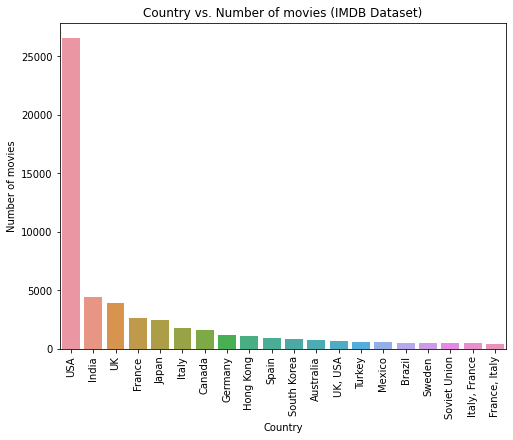

In [38]:
# Plot top 20 countries in movie production
plt.figure(figsize = (8, 6))
sns.barplot(x = column_details(IMDBdata, 'country')[2].index, y = column_details(IMDBdata, 'country')[2].values)
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('Number of movies')
plt.title("Country vs. Number of movies (IMDB Dataset)")
plt.show()

**This dataset also(like Kaggele Dataset) show USA produced maximum number of movies, India ranks second while United Kingdom in third place.** 

### Insight into "year" column 

In [39]:
print('The number of movies released in each year as listed in IMDBdata dataset')
column_details(IMDBdata, 'year')[0], column_details(IMDBdata, 'year')[1]

The number of movies released in each year as listed in IMDBdata dataset


(2017    2621
 2018    2614
 2016    2500
 2015    2353
 2014    2314
         ... 
 1913      10
 1912       4
 1894       1
 1911       1
 1906       1
 Name: year, Length: 112, dtype: int64, 2017    0.036381
 2018    0.036284
 2016    0.034701
 2015    0.032661
 2014    0.032120
           ...   
 1913    0.000139
 1912    0.000056
 1894    0.000014
 1911    0.000014
 1906    0.000014
 Name: year, Length: 112, dtype: float64)

In [40]:
# During Corona pandemic, How many movies are released in 2019 and 2020
movies_2019 = IMDBdata[IMDBdata['year'] == 2019]
print("Number of movies released in 2019", movies_2019.year.count())


movies_2020 = IMDBdata[IMDBdata['year'] == 2020]
print("Number of movies released in 2020", movies_2020.year.count())

Number of movies released in 2019 2221
Number of movies released in 2020 628


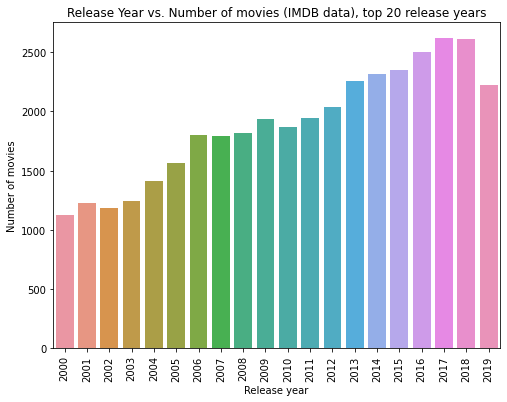

In [41]:
# Plot "Release Year vs Number of movies" from IMDB data
plt.figure(figsize = (8, 6))
sns.barplot(x = column_details(IMDBdata, 'year')[2].index, y = column_details(IMDBdata, 'year')[2].values)
plt.xlabel('Release year')
plt.ylabel('Number of movies')
plt.title("Release Year vs. Number of movies (IMDB data), top 20 release years")
plt.xticks(rotation = 90)
plt.show()

### Investigation into the movies' duration time in minutes

In [42]:
column_details(IMDBdata, 'duration')[0], column_details(IMDBdata, 'duration')[1]

(90     4172
 95     2661
 100    2566
 92     2084
 93     2029
        ... 
 485       1
 421       1
 357       1
 293       1
 319       1
 Name: duration, Length: 257, dtype: int64, 90     0.057910
 95     0.036936
 100    0.035618
 92     0.028927
 93     0.028164
          ...   
 485    0.000014
 421    0.000014
 357    0.000014
 293    0.000014
 319    0.000014
 Name: duration, Length: 257, dtype: float64)

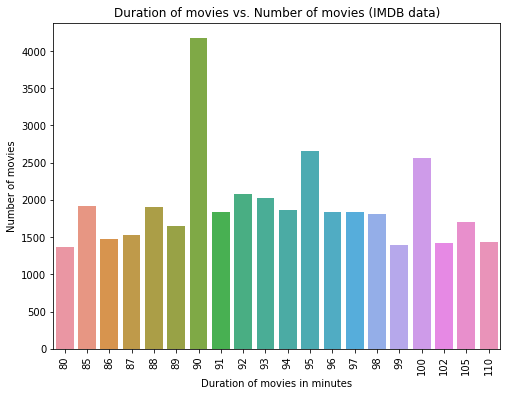

In [43]:
# Plot for 20 top movie duration
plt.figure(figsize = (8, 6))
sns.barplot(x = column_details(IMDBdata, 'duration')[2].index, y = column_details(IMDBdata, 'duration')[2].values)
plt.xlabel('Duration of movies in minutes')
plt.ylabel('Number of movies')
plt.title('Duration of movies vs. Number of movies (IMDB data)')
plt.xticks(rotation = 90)
plt.show()

In [44]:
print("Maximum movie length:", IMDBdata.duration.max())
print("Minimum movie length:", IMDBdata.duration.min())

Maximum movie length: 808
Minimum movie length: 41


In [45]:
# See the deails of the maximum length movie
IMDBdata2 = IMDBdata[IMDBdata.duration == 808]
IMDBdata2

,imdb_title_id,original_title,year,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,reviews_from_users
85057,tt9047474,La flor,2016,"Drama, Fantasy, Musical",808,Argentina,"Catalan, Spanish, French, English, Russian, Ge...",Mariano Llinás,Mariano Llinás,El Pampero Cine,"Elisa Carricajo, Valeria Correa, Pilar Gamboa,...","A film in six episodes, connected by the same ...",7.7,473,5.0


In [46]:
# see the details of the minimum length movie
IMDBdata3 = IMDBdata[IMDBdata.duration == 41]
IMDBdata3

,imdb_title_id,original_title,year,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,reviews_from_users
32798,tt0142235,Doragon bôru Z,1989,"Animation, Action, Adventure",41,Japan,Japanese,Daisuke Nishio,"Akira Toriyama, Takao Koyama",Toei Animation,"Masako Nozawa, Toshio Furukawa, Hiromi Tsuru, ...",In order to wish for immortality and avenge hi...,7.0,6042,17.0


<Figure size 1296x432 with 0 Axes>

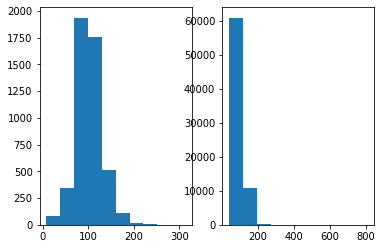

In [47]:
plt.figure(figsize = (18, 6))
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(Kaggledata.duration_min, bins = 10)




ax2.hist(IMDBdata.duration, bins = 10)
plt.show()


### **<font color = 'teal'> Distribution of the USA movies duration in minutes </font>**

In [48]:
USA_movie_duration_IMDB = IMDBdata[IMDBdata.country == 'USA']['duration']

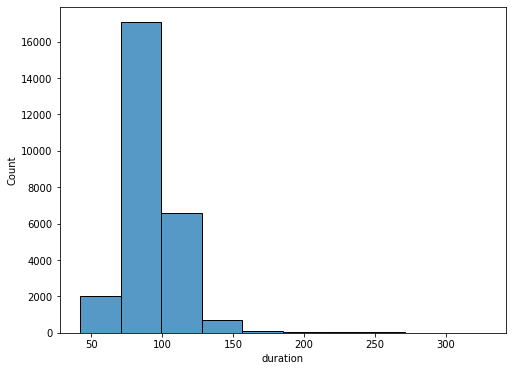

In [49]:
plt.figure(figsize = (8,6))
sns.histplot(USA_movie_duration_IMDB, bins = 10)
plt.show()

### **<font color = 'teal'> Distribution of the Indian movies duration in minutes </font>**

In [50]:
India_movie_duration_IMDB = IMDBdata[IMDBdata.country == 'India']['duration']

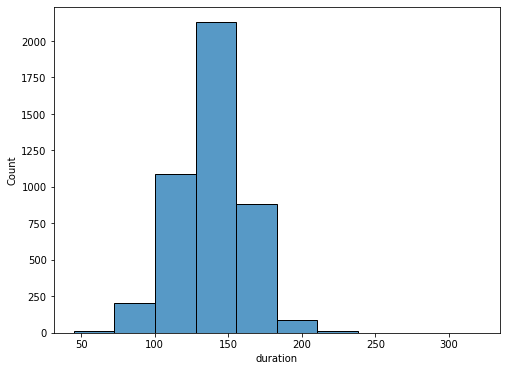

In [51]:
plt.figure(figsize = (8,6))
sns.histplot(India_movie_duration_IMDB, bins = 10)
plt.show()

 ### **<font color = 'teal'> Distribution of the UK movies duration in minutes </font>**

In [52]:
UK_movie_duration_IMDB = IMDBdata[IMDBdata.country == 'UK']['duration']
UK_movie_duration_IMDB.shape

(3869,)

In [53]:
UK_movie_duration_IMDB2 = IMDBdata[IMDBdata.country == 'United Kingdom']['duration']
UK_movie_duration_IMDB2.shape

(0,)

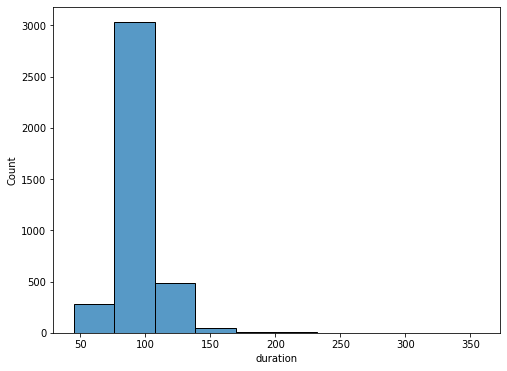

In [54]:
plt.figure(figsize = (8,6))
sns.histplot(UK_movie_duration_IMDB, bins = 10)
plt.show()

##  Investigation into director column of IMDB data

In [55]:
IMDB_USA_director = IMDBdata[IMDBdata['country'] == 'USA']['director']
IMDB_USA_director.value_counts().head(20)

Michael Curtiz        82
Lesley Selander       77
Lloyd Bacon           73
William Beaudine      64
Gordon Douglas        63
Richard Thorpe        62
John Ford             59
Mervyn LeRoy          59
Norman Taurog         56
Joseph Kane           53
Raoul Walsh           52
Alfred E. Green       52
William A. Seiter     51
William A. Wellman    51
George Marshall       50
Roy Del Ruth          48
Ray Enright           48
Lew Landers           48
Fred Olen Ray         46
George Sherman        46
Name: director, dtype: int64

In [56]:
IMDB_Ind_director = IMDBdata[IMDBdata['country'] == 'India']['director']
IMDB_Ind_director

2514     Vishnupant Govind Damle, Sheikh Fattelal
5736                                   Raj Kapoor
6072                                 Mehboob Khan
6082                                   Raj Kapoor
6233                                 Kamal Amrohi
                           ...                   
85823                                 Vyasan K.P.
85828                              Vijith Nambiar
85843                            Lokesh Kanagaraj
85844                             Aswani Kumar V.
85847                                         Zam
Name: director, Length: 4419, dtype: object

In [57]:
IMDB_Ind_director.value_counts().head(20)

Ram Gopal Varma                                        38
David Dhawan                                           37
Priyadarshan                                           32
Mahesh Bhatt                                           27
Satyajit Ray                                           25
Vikram Bhatt                                           24
Puri Jagannadh                                         21
Mani Ratnam                                            20
Hrishikesh Mukherjee                                   19
Yash Chopra                                            18
Rituparno Ghosh                                        16
Shyam Benegal                                          16
Srijit Mukherji                                        15
Abbas Alibhai Burmawalla, Mastan Alibhai Burmawalla    15
Gautham Menon                                          15
Anurag Kashyap                                         14
Rajkumar Santoshi                                      14
Shakti Samanta

In [58]:
IMDB_UK_director = IMDBdata[IMDBdata['country'] == 'UK']['director']
IMDB_UK_director.value_counts().head(20)

Gerald Thomas           39
Ralph Thomas            34
Terence Fisher          30
Basil Dearden           29
Val Guest               28
John Gilling            22
Ken Annakin             22
Lewis Gilbert           22
Anthony Asquith         22
Alfred Hitchcock        21
Roy Ward Baker          21
Freddie Francis         20
Carol Reed              19
Marcel Varnel           17
J. Lee Thompson         16
John Paddy Carstairs    16
Andrew Jones            16
Michael Anderson        15
Lance Comfort           15
Michael Winterbottom    15
Name: director, dtype: int64

In [59]:
IMDBdata.columns

Index(['imdb_title_id', 'original_title', 'year', 'genre', 'duration',
       'country', 'language', 'director', 'writer', 'production_company',
       'actors', 'description', 'avg_vote', 'votes', 'reviews_from_users'],
      dtype='object')

In [60]:
list_unique_values_in_column(IMDBdata, 'writer')

({'Josh Weiner',
  'Sean McPharlin',
  'Vanessa Saba',
  'Scott Sandoe',
  'B. Arthur Cassidy',
  'Pradeep Ranganathan',
  'Mathieu Turi',
  'Sebastian Faulks',
  'Ramesh Kadumula',
  'Charles Scalfani',
  'Boham Liu',
  'Richard Griffin',
  'Mitch Glazer',
  'Phil Lord',
  'Compton MacKenzie',
  'Surrender Reddy',
  'Gerhard Menzel',
  'Farnoosh Samadi',
  'Johnston McCulley',
  'Jeph Loeb',
  'Gerald Seymour',
  'Jonathan Baker',
  'Philip Dalkin',
  'John Kupferschmidt',
  'Christopher Bertolini',
  'Mikhail Papava',
  'Eric Espejo',
  'Tamara Jenkins',
  'Robert Whitlow',
  'Nico Casavecchia',
  'G.J. Echternkamp',
  'Maurice Marks',
  'Raymond Chandler',
  'Piet Geelhoed',
  'Yoshinari Nishikôri',
  'Andrea Staka',
  'John Edward Lee',
  'Jacques Mesrine',
  'Amiri Baraka',
  'Zack Weiner',
  'Mark Antony Krupa',
  'Linda J. Cowgill',
  'Kim Fupz Aakeson',
  'Hrafnkell Stefansson',
  'Gideon Davis',
  'Nacho Cerdà',
  'Cameron Cairnes',
  'Jonas Kvist Jensen',
  'José A. Paxtor',


## Insight into Movie Production companies from top movie production company

In [61]:
IMDBdata.production_company.nunique()

29121

In [62]:
IMDBdata.production_company.value_counts()

Metro-Goldwyn-Mayer (MGM)           1267
Warner Bros.                        1143
Columbia Pictures                    909
Paramount Pictures                   888
Twentieth Century Fox                863
                                    ... 
Contracorriente Producciones SLU       1
Oceanstorm Films                       1
Discreet Arts Productions              1
Cinematic                              1
Principle Entertainment                1
Name: production_company, Length: 29121, dtype: int64

**<font color = 'teal'> USA's top movie production companies </font>** 

In [63]:
IMDBdata[IMDBdata.country =='USA']['production_company'].nunique()

11076

In [64]:
IMDBdata[IMDBdata.country =='USA']['production_company'].value_counts().head(20)

Metro-Goldwyn-Mayer (MGM)                1182
Warner Bros.                              967
Paramount Pictures                        771
Twentieth Century Fox                     760
Columbia Pictures                         738
Universal Pictures                        563
RKO Radio Pictures                        530
Universal International Pictures (UI)     272
Republic Pictures (I)                     208
First National Pictures                   152
New Line Cinema                           150
Touchstone Pictures                       114
Monogram Pictures                         114
Walt Disney Productions                   110
Fox Film Corporation                      104
Walt Disney Pictures                       91
Sam Katzman Productions                    82
TriStar Pictures                           79
Allied Artists Pictures                    69
The Samuel Goldwyn Company                 66
Name: production_company, dtype: int64

**<font color = 'teal'> India's top movie production companies </font>**  

In [65]:
IMDBdata[IMDBdata.country =='India']['production_company'].nunique()

2205

In [66]:
IMDBdata[IMDBdata.country =='India']['production_company'].value_counts().head(20)

NH Studioz                                               107
SVF Entertainment                                         54
Yash Raj Films                                            48
Eros International                                        38
Dharma Productions                                        35
Sri Venkateswara Creations                                25
Fox STAR Studios                                          24
UTV Motion Pictures                                       23
National Film Development Corporation of India (NFDC)     19
Angel Digital Private Limited                             19
Mukta Arts                                                19
Raajkamal Films International                             18
Everest Entertainment                                     17
Rajshri Productions                                       17
Balaji Motion Pictures                                    16
R.K. Films Ltd.                                           16
Geetha Arts             

**<font color = 'teal'> UK's top movie production companies </font>** 

In [67]:
IMDBdata[IMDBdata.country =='UK']['production_company'].nunique()

1910

In [68]:
IMDBdata[IMDBdata.country =='UK']['production_company'].value_counts().head(20)

The Rank Organisation                            107
Hammer Films                                      68
Gainsborough Pictures                             67
Ealing Studios                                    63
London Film Productions                           59
Associated British Picture Corporation (ABPC)     58
BBC Films                                         48
Two Cities Films                                  38
Gaumont British Picture Corporation               36
Columbia Pictures                                 34
Channel Four Films                                31
British Broadcasting Corporation (BBC)            29
British Screen Productions                        25
Romulus Films                                     24
Columbia Pictures Corporation                     23
EMI Films                                         22
J. Arthur Rank Organisation                       22
Peter Rogers Productions                          20
British Film Institute (BFI)                  

# Insight into actors

In [69]:
IMDBdata.columns

Index(['imdb_title_id', 'original_title', 'year', 'genre', 'duration',
       'country', 'language', 'director', 'writer', 'production_company',
       'actors', 'description', 'avg_vote', 'votes', 'reviews_from_users'],
      dtype='object')

In [70]:
list_unique_values_in_column(IMDBdata, 'actors')

({'Kirpal',
  'Eduardo Valdarnini',
  'Dino Zanghi',
  'Jeffrey Suarez',
  'Mehmet Aslantug',
  'David Kossoff',
  'Aytaç Arman',
  'Poli Angelova',
  'Roman Maldonado',
  'Anysia Deprele',
  'Wayne Maugans',
  'Jean-Claude Fal',
  'Ulla Nielsen',
  'John Canada Terrell',
  'S.V. Krishna Shankar',
  'Jim Boyle',
  'Robert Feero',
  'Gina Hightower',
  'Hugo Metsers',
  'Ionita Radu Georgescu',
  'Sandra Herbich',
  'Ndjaba Lavenir',
  'Mona Kristiansen',
  'Deborah Otto',
  'Akemi Nishino',
  'Lauren Rosenberg',
  'M.V. Narayana Rao',
  'Hiroki Uchi',
  'Sara Lyberth',
  'Carolyn Adams',
  'Christina Ormani',
  'Nicole Spate',
  'Tamara Yazbek',
  'Emily Boresow',
  'Taylor Horneman',
  'Marc Barahoma',
  'Kyle June Williams',
  'Edward Albert',
  'Sarah Carson',
  'Prakhar Morchhale',
  'Leopoldo Salcedo',
  'Marie-Thérèse Arène',
  'Suchita Ray Chaudhury',
  'Rodrigo Amarante',
  'Gela Geisler',
  'Garrett Walters',
  'Erik Øksnes',
  'Nicola Harrison',
  'Bernardo Jablonski',
  'Val

## Total number of languages

In [71]:
# This was carried out only on IMDB data set as there is no language column in Netflix dataset
list_unique_values_in_column(IMDBdata, 'language') 

({'Abkhazian',
  'Aboriginal',
  'Afrikaans',
  'Akan',
  'Albanian',
  'Algonquin',
  'American Sign Language',
  'Amharic',
  'Ancient (to 1453)',
  'Apache languages',
  'Arabic',
  'Aragonese',
  'Aramaic',
  'Arapaho',
  'Armenian',
  'Aromanian',
  'Assamese',
  'Assyrian Neo-Aramaic',
  'Athapascan languages',
  'Australian Sign Language',
  'Awadhi',
  'Aymara',
  'Azerbaijani',
  'Bable',
  'Balinese',
  'Bambara',
  'Basque',
  'Belarusian',
  'Bemba',
  'Bengali',
  'Berber languages',
  'Bhojpuri',
  'Bicolano',
  'Bosnian',
  'Brazilian Sign Language',
  'Breton',
  'British Sign Language',
  'Bulgarian',
  'Burmese',
  'Cantonese',
  'Catalan',
  'Central American Indian languages',
  'Chechen',
  'Cheyenne',
  'Chinese',
  'Cornish',
  'Corsican',
  'Cree',
  'Creek',
  'Crimean Tatar',
  'Croatian',
  'Crow',
  'Czech',
  'Danish',
  'Dari',
  'Dinka',
  'Dutch',
  'Dyula',
  'Dzongkha',
  'Eastern Frisian',
  'Egyptian (Ancient)',
  'English',
  'Esperanto',
  'Estonia

### List of languages for each top movie producing countries(USA, India, UK)

In [72]:
IMDBdata_USA = IMDBdata[IMDBdata['country'].str.contains('USA', regex = True)]
IMDBdata_USA[['country', 'language']]

,country,language
0,USA,None
3,USA,English
5,USA,English
9,"France, USA",English
17,USA,English
...,...,...
85812,USA,English
85830,USA,English
85837,USA,English
85838,USA,English


In [73]:
list_unique_values_in_column(IMDBdata_USA, 'language') 

({'Aboriginal',
  'Afrikaans',
  'Akan',
  'Albanian',
  'Algonquin',
  'American Sign Language',
  'Amharic',
  'Ancient (to 1453)',
  'Apache languages',
  'Arabic',
  'Aramaic',
  'Arapaho',
  'Armenian',
  'Aromanian',
  'Assyrian Neo-Aramaic',
  'Athapascan languages',
  'Bambara',
  'Basque',
  'Belarusian',
  'Bengali',
  'Berber languages',
  'Bosnian',
  'Brazilian Sign Language',
  'British Sign Language',
  'Bulgarian',
  'Burmese',
  'Cantonese',
  'Catalan',
  'Central American Indian languages',
  'Chechen',
  'Cheyenne',
  'Chinese',
  'Cornish',
  'Corsican',
  'Cree',
  'Creek',
  'Croatian',
  'Crow',
  'Czech',
  'Danish',
  'Dari',
  'Dutch',
  'Egyptian (Ancient)',
  'English',
  'Esperanto',
  'Estonian',
  'Filipino',
  'Finnish',
  'Flemish',
  'French',
  'French Sign Language',
  'Georgian',
  'German',
  'Greek',
  'Greenlandic',
  'Guarani',
  'Gujarati',
  'Haitian',
  'Hakka',
  'Hawaiian',
  'Hebrew',
  'Hindi',
  'Hmong',
  'Hokkien',
  'Hopi',
  'Hungar

In [74]:
IMDBdata_India = IMDBdata[IMDBdata['country'].str.contains('India', regex = True)]
IMDBdata_India[['country', 'language']]

,country,language
787,"UK, India, Germany",English
2514,India,"Marathi, Hindi"
5736,India,Hindi
6072,India,Hindi
6082,India,Hindi
...,...,...
85828,India,Malayalam
85831,"India, Netherlands, Singapore",Tamil
85843,India,Tamil
85844,India,Telugu


In [75]:
list_unique_values_in_column(IMDBdata_India, 'language') 

({'Apache languages',
  'Arabic',
  'Assamese',
  'Awadhi',
  'Bengali',
  'Bhojpuri',
  'Cantonese',
  'Catalan',
  'Chinese',
  'Czech',
  'Dari',
  'Dutch',
  'English',
  'Filipino',
  'French',
  'Georgian',
  'German',
  'Greek',
  'Gujarati',
  'Haryanvi',
  'Hebrew',
  'Himachali',
  'Hindi',
  'Hopi',
  'Icelandic',
  'Indian Sign Language',
  'Indonesian',
  'Italian',
  'Japanese',
  'Kannada',
  'Kashmiri',
  'Konkani',
  'Korean',
  'Ladakhi',
  'Latin',
  'Malay',
  'Malayalam',
  'Mandarin',
  'Manipuri',
  'Marathi',
  'Mongolian',
  'Nepali',
  'None',
  'Oriya',
  'Parsee',
  'Persian',
  'Polish',
  'Portuguese',
  'Punjabi',
  'Rajasthani',
  'Romanian',
  'Russian',
  'Sanskrit',
  'Sindhi',
  'Spanish',
  'Swahili',
  'Swedish',
  'Tamil',
  'Telugu',
  'Thai',
  'Tibetan',
  'Tulu',
  'Turkish',
  'Ukrainian',
  'Urdu',
  'Uzbek'},
 66)

In [76]:
IMDBdata_UK = IMDBdata[IMDBdata['country'].str.contains('UK', regex = True)]
IMDBdata_UK[['country', 'language']]

,country,language
315,UK,English
393,UK,English
437,"UK, Germany",English
449,"UK, Germany",English
499,UK,None
...,...,...
85770,UK,English
85772,UK,English
85784,UK,English
85827,UK,English


In [77]:
list_unique_values_in_column(IMDBdata_UK, 'language') 

({'Aboriginal',
  'Afrikaans',
  'Akan',
  'Albanian',
  'Algonquin',
  'American Sign Language',
  'Amharic',
  'Ancient (to 1453)',
  'Apache languages',
  'Arabic',
  'Armenian',
  'Assamese',
  'Athapascan languages',
  'Azerbaijani',
  'Basque',
  'Bemba',
  'Bengali',
  'Bosnian',
  'Brazilian Sign Language',
  'Breton',
  'British Sign Language',
  'Bulgarian',
  'Burmese',
  'Cantonese',
  'Catalan',
  'Chinese',
  'Corsican',
  'Croatian',
  'Czech',
  'Danish',
  'Dari',
  'Dutch',
  'Dzongkha',
  'Egyptian (Ancient)',
  'English',
  'Esperanto',
  'Estonian',
  'Filipino',
  'Finnish',
  'French',
  'French Sign Language',
  'Georgian',
  'German',
  'Greek',
  'Greenlandic',
  'Guarani',
  'Gujarati',
  'Hawaiian',
  'Hebrew',
  'Hindi',
  'Hungarian',
  'Icelandic',
  'Indonesian',
  'Inuktitut',
  'Irish',
  'Italian',
  'Japanese',
  'Kashmiri',
  'Khmer',
  'Kinyarwanda',
  'Klingon',
  'Korean',
  'Kurdish',
  'Lao',
  'Latin',
  'Latvian',
  'Lingala',
  'Lithuanian',

## Insight into avg_vote in IMDB data

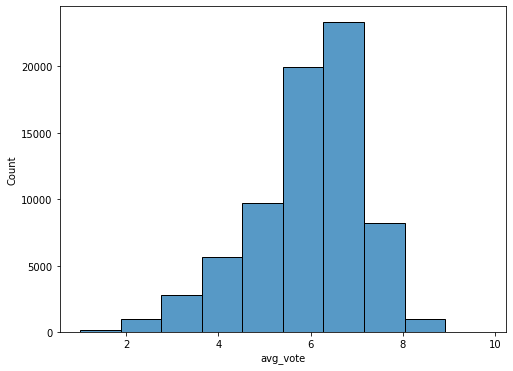

In [78]:
plt.figure(figsize = (8, 6))
sns.histplot(IMDBdata.avg_vote, bins = 10)
plt.show()

## Insight into reviews_from_users in IMDB data

In [79]:
IMDBdata.reviews_from_users.describe()

count    72043.000000
mean        49.213262
std        185.479430
min          1.000000
25%          4.000000
50%         10.000000
75%         29.000000
max      10472.000000
Name: reviews_from_users, dtype: float64

In [80]:
IMDBdata.reviews_from_users.value_counts()

1.0       6126
2.0       5541
3.0       4716
4.0       4074
5.0       3535
          ... 
888.0        1
1847.0       1
526.0        1
691.0        1
1210.0       1
Name: reviews_from_users, Length: 1211, dtype: int64

In [81]:
IMDBdata2 = IMDBdata[IMDBdata.reviews_from_users < 1000]

In [82]:
IMDBdata2.shape

(71660, 15)

In [83]:
IMDBdata3 = IMDBdata[IMDBdata.reviews_from_users < 800]

In [84]:
IMDBdata3.shape

(71453, 15)

In [85]:
IMDBdata4 = IMDBdata[IMDBdata.reviews_from_users < 600]

In [86]:
IMDBdata4.shape

(71089, 15)

In [87]:
IMDBdata5 = IMDBdata[IMDBdata.reviews_from_users < 500]

In [88]:
IMDBdata5.shape

(70817, 15)

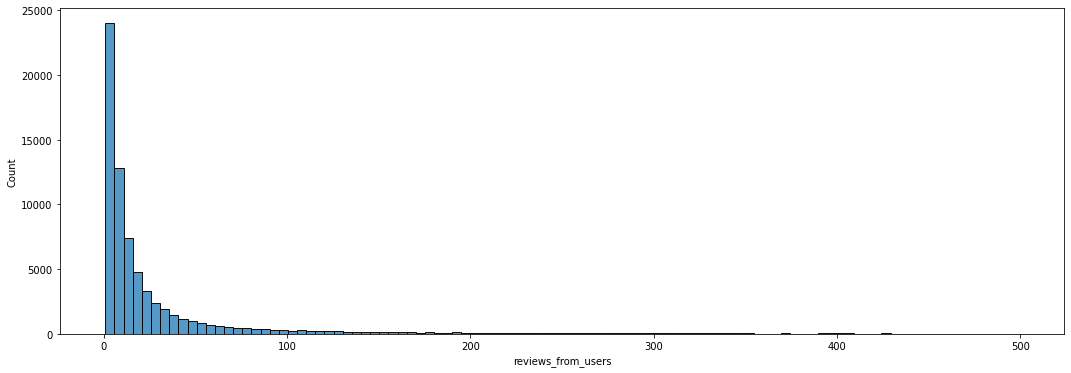

In [89]:
plt.figure(figsize = (18, 6))
sns.histplot(IMDBdata5.reviews_from_users, bins = 100 )
plt.show()

## Insight into votes in IMDB data

In [90]:
IMDBdata.votes.describe()

count    7.204300e+04
mean     1.120770e+04
std      5.828924e+04
min      9.900000e+01
25%      2.420000e+02
50%      6.170000e+02
75%      2.425000e+03
max      2.278845e+06
Name: votes, dtype: float64

In [91]:
IMDBdata.votes.value_counts()

105      210
101      198
109      191
113      188
112      188
        ... 
20368      1
3992       1
6043       1
12188      1
4094       1
Name: votes, Length: 14860, dtype: int64

In [92]:
IMDB_300 = IMDBdata[IMDBdata.votes < 300]
IMDB_300.shape

(22340, 15)

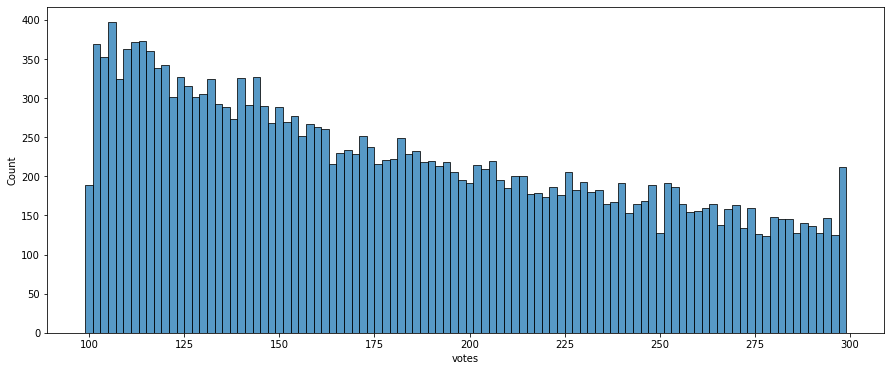

In [93]:
plt.figure(figsize = (15, 6))
sns.histplot(IMDB_300.votes, bins = 100)
plt.show()

# Part-III: Comparision between two datasets

<Figure size 1296x432 with 0 Axes>

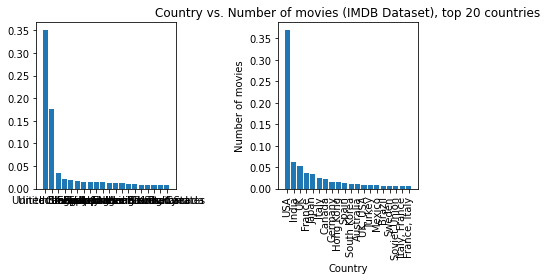

In [94]:
# Country column
plt.figure(figsize = (18, 6))
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.bar(x = column_details(Kaggledata, 'country')[1].index[:20], height = column_details(Kaggledata, 'country')[1].values[:20])
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('Number of movies')
plt.title("Country vs. Number of movies (Kaggle Dataset), top 20 countries")
fig.subplots_adjust(wspace = 2)


ax2.bar(x = column_details(IMDBdata, 'country')[1].index[:20], height = column_details(IMDBdata, 'country')[1].values[:20])
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('Number of movies')
plt.title("Country vs. Number of movies (IMDB Dataset), top 20 countries")
plt.tight_layout()
plt.show()

In [95]:
# Movie duration 
print("Maximum movie length listed in Kaggle datset:", Kaggledata.duration_min.max())
print("Minimum movie length listed in Kaggle dataset:", Kaggledata.duration_min.min())
print("Maximum movie length listed in IMDB datset:", IMDBdata.duration.max())
print("Minimum movie length listed in IMDB dataset:", IMDBdata.duration.min())


print("\nMost of the movies are of length (as listed in Kaggle Dataset):", Kaggledata.duration_min.value_counts().idxmax())
print("Most of the movies are of length (as listed in IMDB Dataset):", IMDBdata.duration.value_counts().idxmax())

Maximum movie length listed in Kaggle datset: 312
Minimum movie length listed in Kaggle dataset: 8
Maximum movie length listed in IMDB datset: 808
Minimum movie length listed in IMDB dataset: 41

Most of the movies are of length (as listed in Kaggle Dataset): 93
Most of the movies are of length (as listed in IMDB Dataset): 90


In [96]:
# movie Release year
print("Maximum number of movies relased  in the year as listed in Kaggle datset:", Kaggledata.release_year.value_counts().idxmax())

print("Maximum number of movies released  in the year as listed in IMDB datset:", IMDBdata.year.value_counts().idxmax())

Maximum number of movies relased  in the year as listed in Kaggle datset: 2017
Maximum number of movies released  in the year as listed in IMDB datset: 2017


# Part-IV

In [97]:
Kaggledata.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration_min', 'listed_in', 'description'],
      dtype='object')

**<font color = 'teal'>There is no need of the "show_id", "type" and "rating" columns, hence these are dropped from the dataset.</font>**

In [98]:
Kaggledata.drop(columns = ['show_id', 'type', 'rating'], inplace = True)

In [99]:
IMDBdata.columns

Index(['imdb_title_id', 'original_title', 'year', 'genre', 'duration',
       'country', 'language', 'director', 'writer', 'production_company',
       'actors', 'description', 'avg_vote', 'votes', 'reviews_from_users'],
      dtype='object')

**<font color = 'teal'> The 'imdb_title_id' column seems to be not useful for further analysis or building Machine Learning model. Hence this columns needs to be dropped from the dataset.**

In [100]:
IMDBdata.drop(columns = ['imdb_title_id'], inplace = True )

**<font color = 'teal'> In both datasets, there are some columns meaning same, whereas their names are different. So for further investigation, they were named same.**

In [101]:
IMDBdata.rename(columns = {'original_title': 'title', 'year': 'release_year', 'duration': 'duration_min'}, inplace = True)

In [102]:
Kaggledata.dropna(inplace = True)
Kaggledata.shape

(4761, 8)

In [103]:
IMDBdata.dropna(inplace = True)
IMDBdata.shape

(72043, 14)

## Relationship among differnet numerical columns in the dataset

**<font color = 'teal'>There are few numerical columns in the IMDB dataset. Hence let us investigation into the relationship among them plotting the pairplots.**

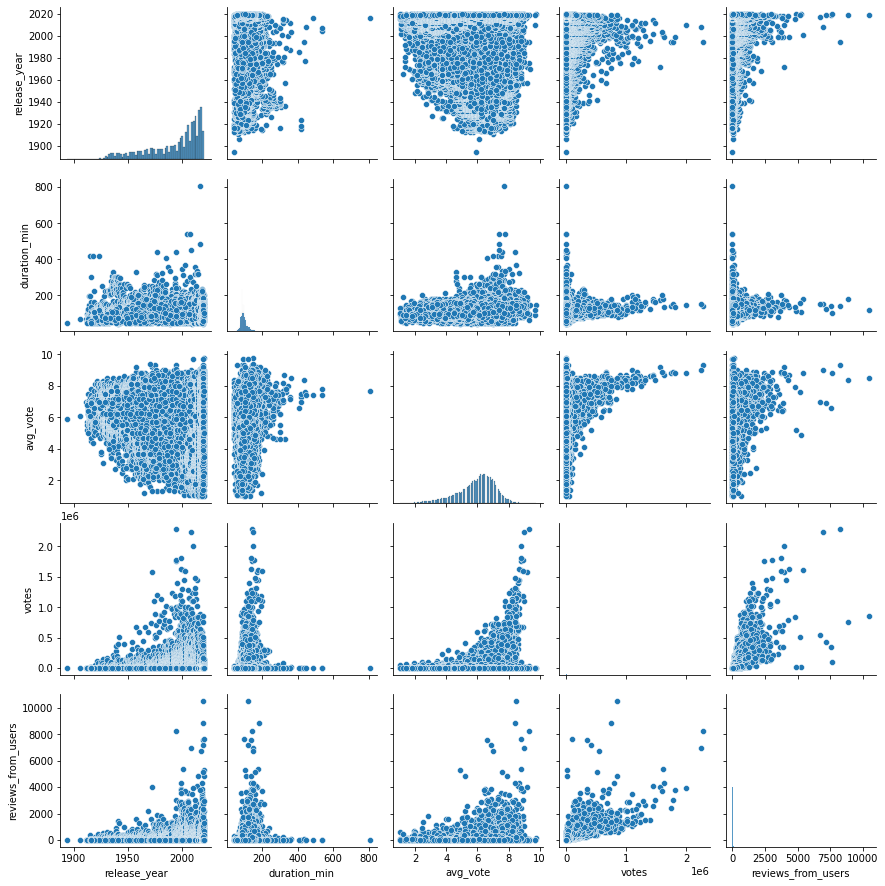

In [104]:
sns.pairplot(IMDBdata)
plt.show()

In [105]:
# Save both datsets
Kaggledata.to_csv("clean_datafiles/Kaggledata_ready_for_preprocessing.csv")
IMDBdata.to_csv("clean_datafiles/IMDBdata_ready_for_preprocessing.csv")

# Summary

We used two movie datasets : Kaggle dataset (named Netflix) and IMDB dataset (named IMDBdata). The Kaggle dataset is smaller one with 4761 rows while IMDB dataset large with 72043 rows.<br><br>
Detail investigations into each column of both datasets was carried out and following conclusions were drwan:<br>
* Both datasets show USA ranked Number One in movie production, while India ranked Second followed by United Kingdom in Third place.<br><br>
* These are three movie production companies ranking as follows.<br>
Metro-Goldwyn-Mayer (MGM)    1267<br>
Warner Bros.                 1143<br>
Columbia Pictures             909<br><br>
* In USA top movie production company is: Metro-Goldwyn-Mayer <br>
In India top movie production company is: NH Studioz <br>
In UK top movie production company is: The Rank Organisation <br><br>
* Both datasets show most of the movies are of length ~100 mins.<br><br>